# Introduction

Bellabeat is a high-tech manufacturer of health-focused products for women. To unlock opportunities for the company to grow, usage data about one of the company's products is to be analyzed to determine how consumers are using their smart devices, and then give recommendations about what marketing strategy should be employed.

The data used is a Fitbit usage dataset generated via a survey run in spring of 2016, with the provided data spanning from April 12, 2016 to May 9, 2016. It is hosted on Kaggle.com by user arashnic under a CC0 public domain license. The dataset provides daily, hourly, and minute-wise logs of steps taken, distance covered, physical activity intensity, calories, weight, and sleep time.

One problem with the data is that it was collected six years ago, so it is not recent and may not reflect current consumers' usage habits. Another one is that the survey participants' demographics were not recorded, so it is unknown how many are women, the target consumer group, or whether all races and ethnicities are represented. Furthermore, the sample size is small, with about thirty participants total, and the survey time is brief, so it may not be representative of year-round or all potential users' smart device usage habits. However, the data should still be enough to get a general idea of what smart device users' health needs and habits are.

# Processing

The necessary libraries are imported and the data files to be used are read in. The files for this analysis will be the daily activity, sleep, and hourly intensity logs.

In [25]:
# Set cell config to print all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in data as dataframes
activity = pd.read_csv('Fitabase_Data_4.12.16-5.12.16\dailyActivity_merged.csv')
sleep = pd.read_csv('Fitabase_Data_4.12.16-5.12.16\sleepDay_merged.csv')
intensity = pd.read_csv('Fitabase_Data_4.12.16-5.12.16\hourlyIntensities_merged.csv')

Check if there are any null or duplicated values in the data, and then drop the rows that contain them. Then, see how many unique ID's are in each dataframe, which will show how many participants gave their data for that category.

In [26]:
# Find sum of all null values for each column
activity.isna().sum().sum()
sleep.isna().sum().sum()
intensity.isna().sum().sum()

# Find all duplicated rows
activity.duplicated().sum()
sleep.duplicated().sum()
intensity.duplicated().sum()

# Count number of unique ID's/participants
activity['Id'].nunique()
sleep['Id'].nunique()
intensity['Id'].nunique()

0

0

0

0

3

0

33

24

33

So there are no null values, the sleep dataframe contains three duplicated rows, and both the activity and intensity dataframes have 33 participants while the sleep dataframe has only 24. However, 24 participants is enough that the sleep dataset is still useful.

In [27]:
# Drop the duplicated rows from the sleep dataframe
sleep.drop_duplicates(inplace = True)

# Get an overview of the data in the cleaned dataframes
activity.head()
sleep.head()
intensity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


The dates are in the wrong format and should be converted to datetimes, which will make them easier to work with later. The times given in the sleep dataframe all appear to be 12:00:00 AM, so most likely they are default values and can be ignored, while those in the intensity dataframe will be converted to 24-hour format.

In [28]:
# Convert the dates and times
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
intensity['ActivityHour'] = pd.to_datetime(intensity['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')

# Check that the conversions were done correctly
activity.head()
sleep.head()
intensity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


# Analysis

First, let's see the statistics of select columns of the dataframes.

In [29]:
activity[['TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].describe()
sleep['TotalMinutesAsleep'].describe()
intensity[['TotalIntensity', 'AverageIntensity']].describe()

,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,21.164894,13.564894,192.812766,991.210638,2303.609574
std,5087.150742,32.844803,19.987404,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,36019.000000,210.000000,143.000000,518.000000,1440.000000,4900.000000


count    410.000000
mean     419.173171
std      118.635918
min       58.000000
25%      361.000000
50%      432.500000
75%      490.000000
max      796.000000
Name: TotalMinutesAsleep, dtype: float64

,TotalIntensity,AverageIntensity
count,22099.000000,22099.000000
mean,12.035341,0.200589
std,21.133110,0.352219
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,0.050000
75%,16.000000,0.266667
max,180.000000,3.000000


The average steps taken per day is about 7638, which is a few hundred below the CDC-recommended minimum 8000 steps.

One thing that jumps out is the sleep time from the sleep dataset. According to the CDC, the recommended amount of sleep for adults is 7 to 9 hours, or 420 to 540 minutes. The mean sleep time is about 419 minutes, and the 50th percentile on the lower side at only 432.5 minutes. Let's check how many of the participants truly are undersleepers, or if there are outliers influencing the data.

<Figure size 864x576 with 0 Axes>

<AxesSubplot:title={'center':'Total Minutes Asleep'}, xlabel='Id'>

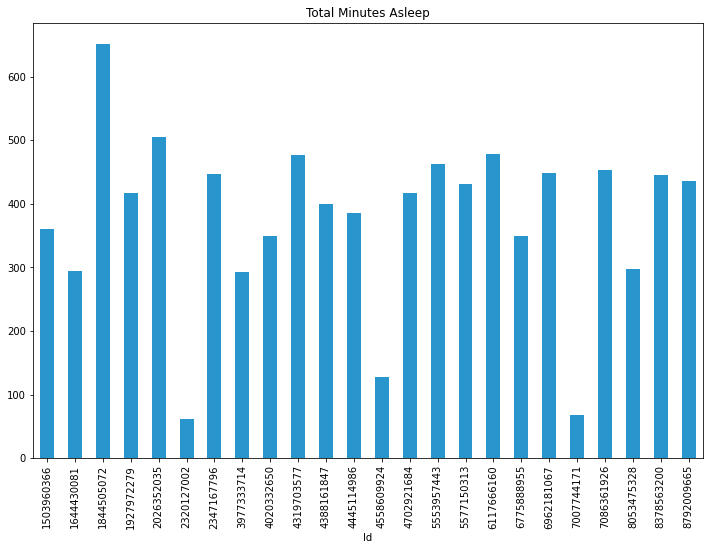

In [30]:
sleeptime = sleep.groupby('Id')['TotalMinutesAsleep'].mean()
plt.figure(figsize = (12, 8))
sleeptime.plot.bar(x = 'Id', y = 'TotalMinutesAsleep', color = '#2896CC', legend = False, title = 'Total Minutes Asleep')

As can be seen from the visualization, there are three participants with very low average sleep times, which indicates that they most likely did not record sleep time data for several nights, resulting in entries with "zero" sleep.

Let's confirm the most common sleep times.

[Text(0.5, 1.0, 'Proportion of Sleep Times'), Text(0, 0.5, 'Count')]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Extreme Undersleeper'),
  Text(1, 0, 'Undersleeper'),
  Text(2, 0, 'Healthy Sleeper'),
  Text(3, 0, 'Oversleeper')])

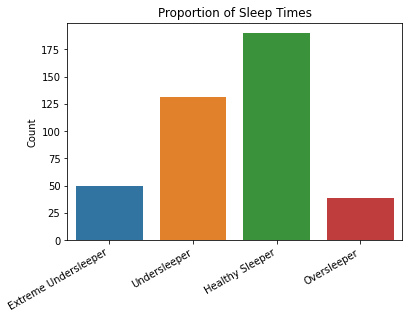

In [31]:
sleep_level = [0, 0, 0, 0]
for i in range(0, len(sleep['TotalMinutesAsleep'])):
    sleep_time = sleep['TotalMinutesAsleep'].iloc[i]
    if sleep_time >= 420 and sleep_time <= 540:
        sleep_level[2] += 1
    elif sleep_time > 540:
        sleep_level[3] += 1
    elif sleep_time > 300:
        sleep_level[1] += 1
    else:
        sleep_level[0] += 1

sns.barplot(x = ["Extreme Undersleeper", "Undersleeper", "Healthy Sleeper", "Oversleeper"], y = [sleep_level[0], sleep_level[1], sleep_level[2], sleep_level[3]]).set(title = "Proportion of Sleep Times", ylabel = "Count")
plt.xticks(rotation = 30, ha = 'right')

So it appears that participants primarily get between 5 to 9 hours of sleep, which is not too unhealthy.

Now let's see the breakdown of activity time by participant.

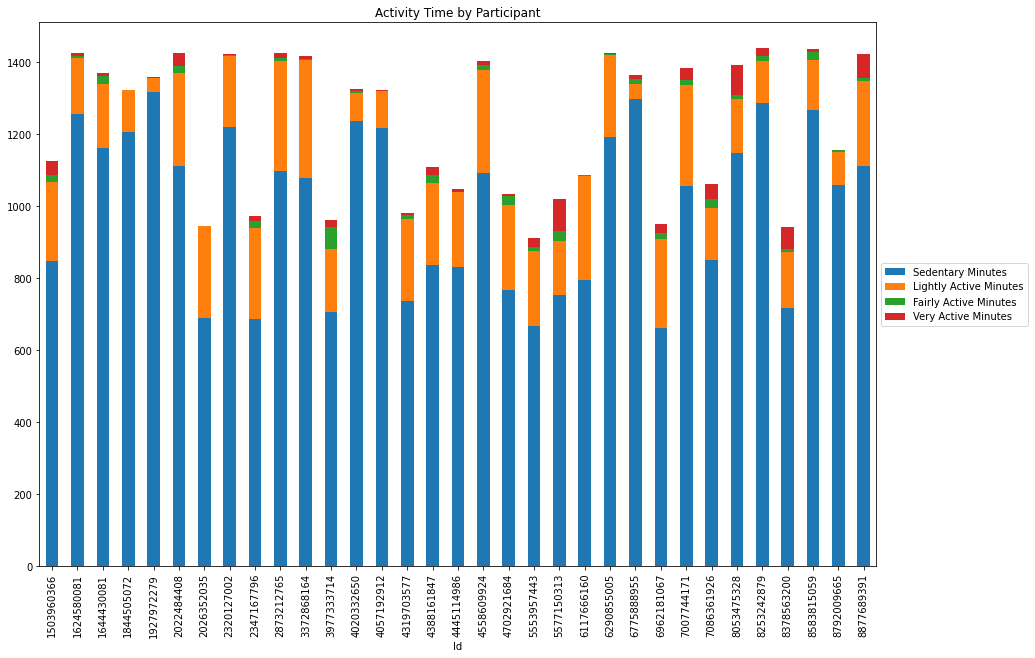

In [32]:
participant_activity = activity.groupby('Id')[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].mean()
participant_activity.reset_index(inplace = True)

participant_activity.plot(x = 'Id', kind = 'bar', title = 'Activity Time by Participant', figsize = (15, 10), stacked = True).legend(labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes'], loc='center left', bbox_to_anchor=(1.0, 0.5))

It appears that participants spend the vast majority of their time sedentary, and that the next most common time use was being lightly active.

Let's see if there's a correlation between exercise intensity and length of sleep time.

<AxesSubplot:xlabel='Id'>

<AxesSubplot:xlabel='Id'>

Text(0.5, 1.0, 'Sleep by Intensity Compared with Total Intensity')

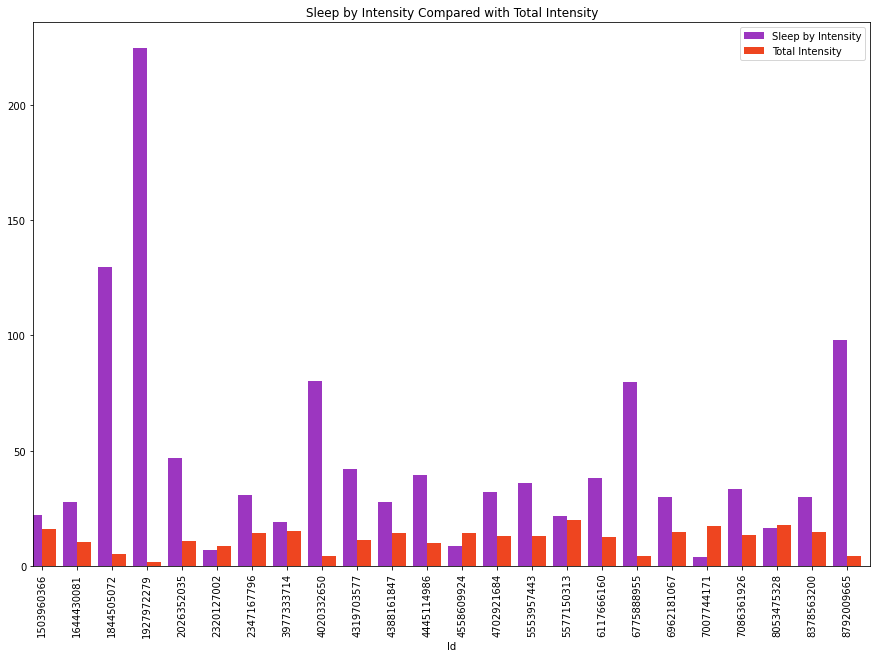

In [33]:
user_intensity_sleep = intensity.groupby('Id')[['TotalIntensity', 'AverageIntensity']].mean()
user_intensity_sleep['TotalMinutesAsleep'] = sleep.groupby('Id')['TotalMinutesAsleep'].mean()
user_intensity_sleep['SleepByIntensity'] = user_intensity_sleep['TotalMinutesAsleep'] / user_intensity_sleep['TotalIntensity']
user_intensity_sleep.dropna(axis = 'index', inplace = True)
user_intensity_sleep.reset_index(inplace = True)

fig, ax = plt.subplots(figsize = (15, 10))
user_intensity_sleep.plot.bar(x = 'Id', y = 'SleepByIntensity', position = 1, width = 0.4, label = 'Sleep by Intensity', color = '#9C36C0', ax = ax)
user_intensity_sleep.plot.bar(x = 'Id', y = 'TotalIntensity', position = 0, width = 0.4, label = 'Total Intensity', color = '#EE4520', ax = ax)
plt.title('Sleep by Intensity Compared with Total Intensity')

It appears that the lower the total intensity of the exercise done, the longer the participant slept. This may be caused by the fact that sedentary people will sleep more, while those who like to get active and move about will want to spend less time sleeping.

As noted before, the average steps taken daily by the participants is a little below the recommended minimum for health benefits. Let's see if there is a correlation between steps taken and calories burned, which would reveal benefits for weight management.

<Figure size 1080x720 with 0 Axes>

[Text(0.5, 1.0, 'Calories Burned vs Total Steps'),
 Text(0.5, 0, 'Total Steps'),
 Text(0, 0.5, 'Calories')]

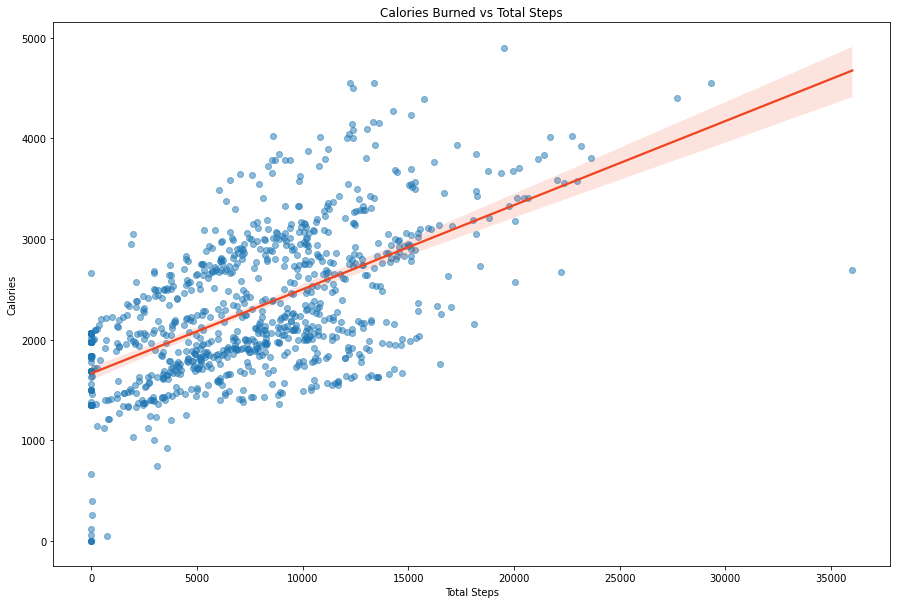

In [34]:
plt.figure(figsize = (15, 10))
sns.regplot(x = activity['TotalSteps'], y = activity['Calories'], scatter_kws = {'alpha' : 0.5}, line_kws = {'color' : '#EE4520'}).set(title = "Calories Burned vs Total Steps", xlabel = "Total Steps", ylabel = "Calories")

So there is a positive correlation between the total daily steps taken and the number of calories burned, which provides definite proof that getting a certain number of daily steps can have health benefits.

# Conclusion

From the data summaries and visualizations, there are a few insights that can be used to guide Bellabeat's marketing strategy.

Consumers tend to not get the recommended minimum number of daily steps, so the health app could be modified to track steps taken, and remind users to hit their daily goal. This goes in hand with the fact that consumers are primarily sedentary, so the app should encourage them to exercise when they can.

Likewise, some participants do not get the optimal amount of sleep, so the app can let users define a bedtime and wakeup time goal, and then remind them about and help them wind down to go to bed at the right time.

Finally, it was found that the number of calories burned was proportional to the number of daily steps taken. Thus, the app could help users manage their weight by logging their activity and predicting how many calories they have burned.

All of these takeaways would help consumers become healthier and would establish Bellabeat as a driver for improving one's quality of life. Therefore, the marketing strategy should focus around these important insights and emphasize how consumers can reach these goals through using Bellabeat's products.